In [1]:
# impor all the required libraries
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
%matplotlib inline
sns.set(color_codes=True)
from IPython.display import display

In [2]:
# import the data 
bank = pd.read_csv('bank-full.csv')

In [3]:
# get the shape of the daa
bank.shape

(45211, 17)

In [4]:
# do a quick lookup 
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Column names and description

1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds
13. campaign: number of contacts performed during this campaign and for this
14. pdays: number of days that passed by after the client was last contacted from a
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [5]:
bank.info() # use pandas info to get a sence of data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# find min, Q1, Q2, Q3 , max. mean and standard devation for numeric columns
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


## Here we see the range, standard deviation, central values and quartiles

In [7]:
bank.select_dtypes(include='O').nunique() # check the nunique values of categorical columns

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
Target        2
dtype: int64

## Checking the distribution of values for different categorical columns

In [8]:
keys = bank.select_dtypes(include='O').nunique().keys()  # select the object columns
for i in keys: # for different oobject columns check value counts
    print(bank[i].value_counts())
    print('\n\n')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64



married     27214
single      12790
divorced     5207
Name: marital, dtype: int64



secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64



no     44396
yes      815
Name: default, dtype: int64



yes    25130
no     20081
Name: housing, dtype: int64



no     37967
yes     7244
Name: loan, dtype: int64



cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64



may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64



unknown    36959
failure     4901
other       1840
success     1511
Name: 

## Missing Values in Columns
### job : 288
### education 1857
### contact 13020
### poutcome 36959

## As a result I will try to do some imputaton in job and education columns but would not do any for contact and poutcome as they are too manhy

In [9]:
num_cols = list(bank.describe().columns)

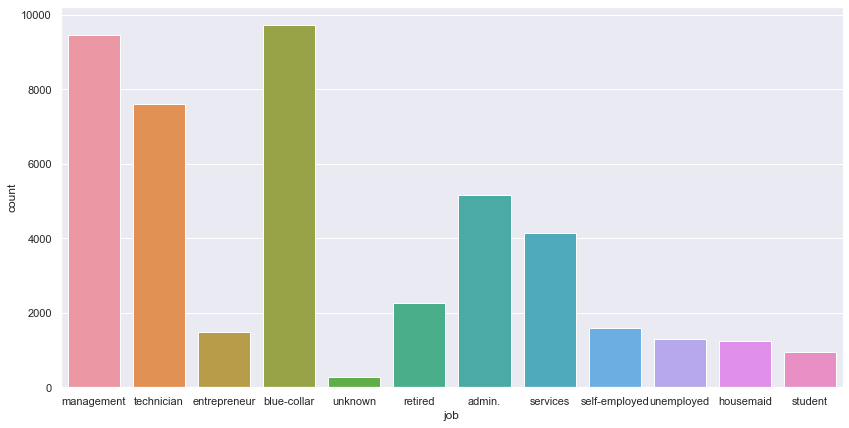

In [10]:
plt.figure(figsize=(14,7))
sns.countplot(bank['job']);

### from the distribution we can see manaement, technician and blue collar jobs are dominating

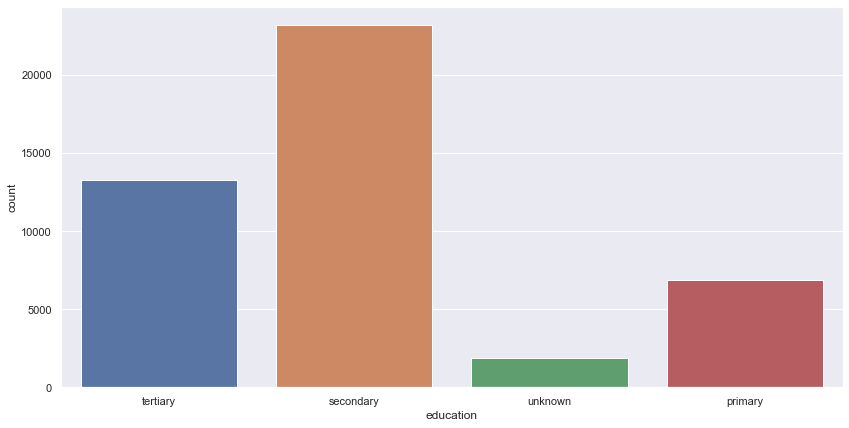

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(bank['education']);

### from the graph we can infer secondary level education is most dominating

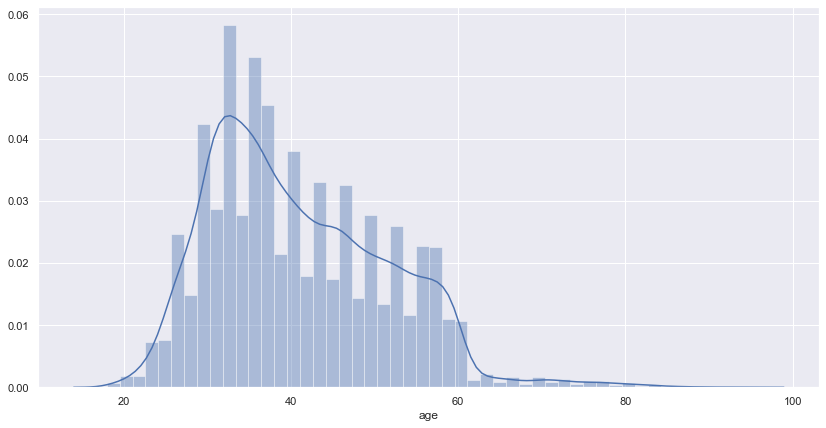

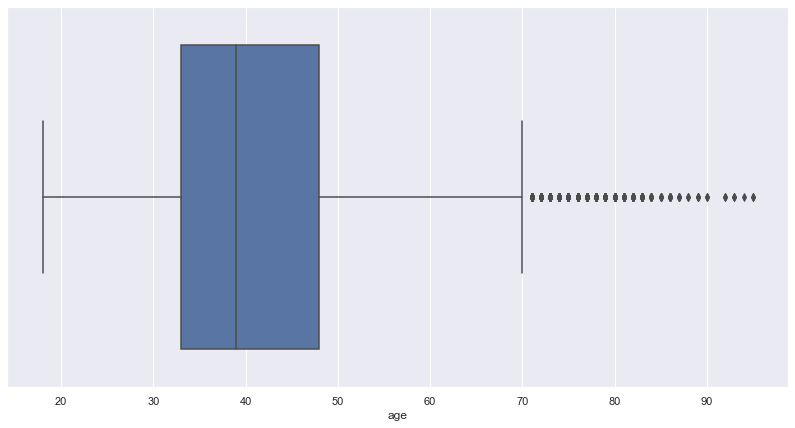

In [12]:
plt.figure(figsize=(14,7))
sns.distplot(bank['age'])
plt.show()
plt.figure(figsize=(14,7))
sns.boxplot(bank['age'])
plt.show()

### From the distribution plot we can see than age does not follow a normal distribution and is skewed towards right, also from the box plot we could see some outliers and we can remove it to see if out model performance improves

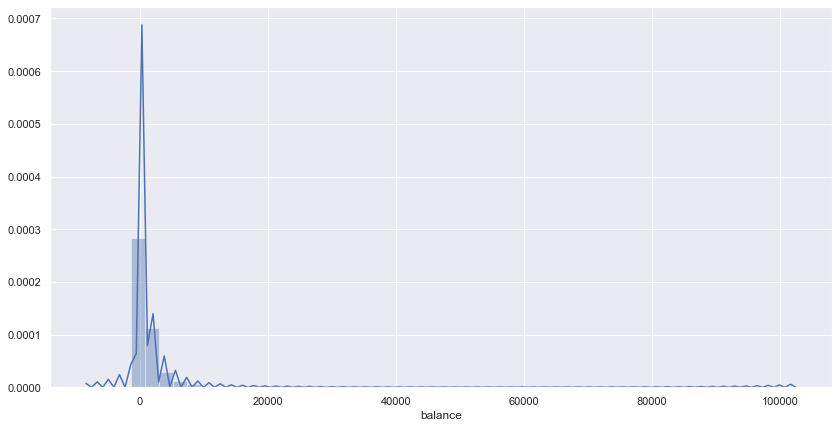

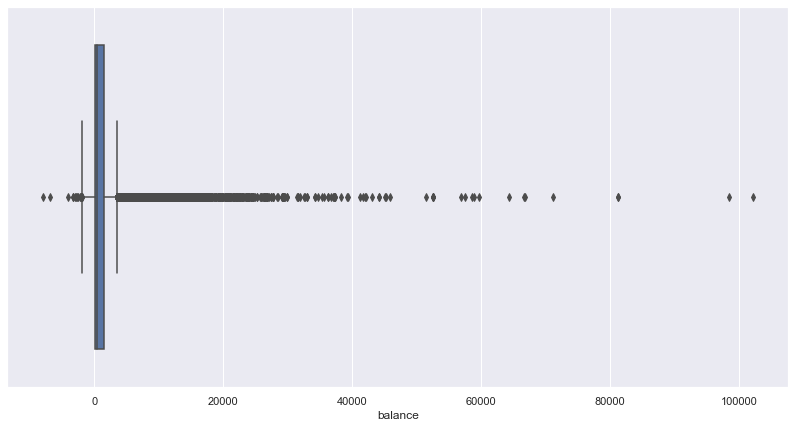

In [13]:
plt.figure(figsize=(14,7))
sns.distplot(bank['balance'])
plt.show()
plt.figure(figsize=(14,7))
sns.boxplot(bank['balance'])
plt.show()

### From the distribution plot we can see than bank balance does not follow a normal distribution and is skewed towards right, also from the box plot we could see some outliers and we can remove it to see if out model performance improves

#### As said earlier we would try to use imputaion for education and job columns. It will be based on combination of job, age , education and balance column taking mean, mode wherever applicable. 

#### For outlier we will try to replace the value of outlier wih the limit i.e. Q3 + 1.5*IQR or Q1 - 1.5*IQR wherever applcable and see if the model improves

####  we will try to use some binning to see if our accuracy improves

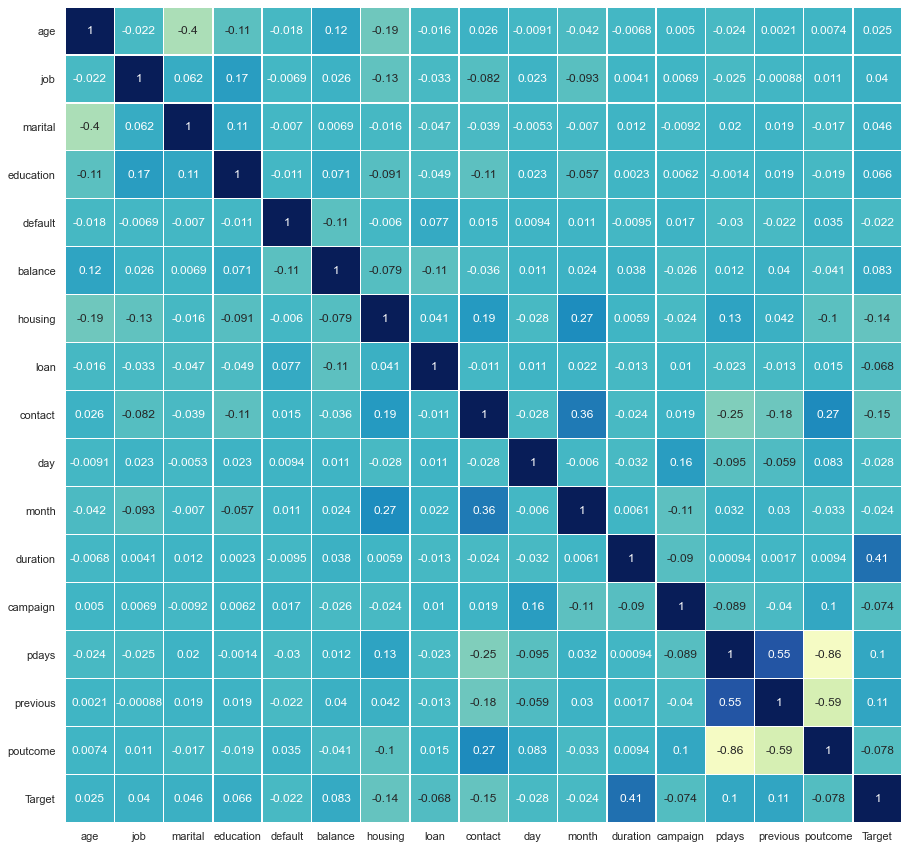

In [14]:
bank2 = bank.copy()
bank2 = bank2.apply(LabelEncoder().fit_transform)
plt.figure(figsize=(15,15))

sns.heatmap(bank2.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

### From the correlation metric only duraction of last contact looks highly correlated with our target variable but we cant be sure about its cause and effect relation since correlation does not imply causation

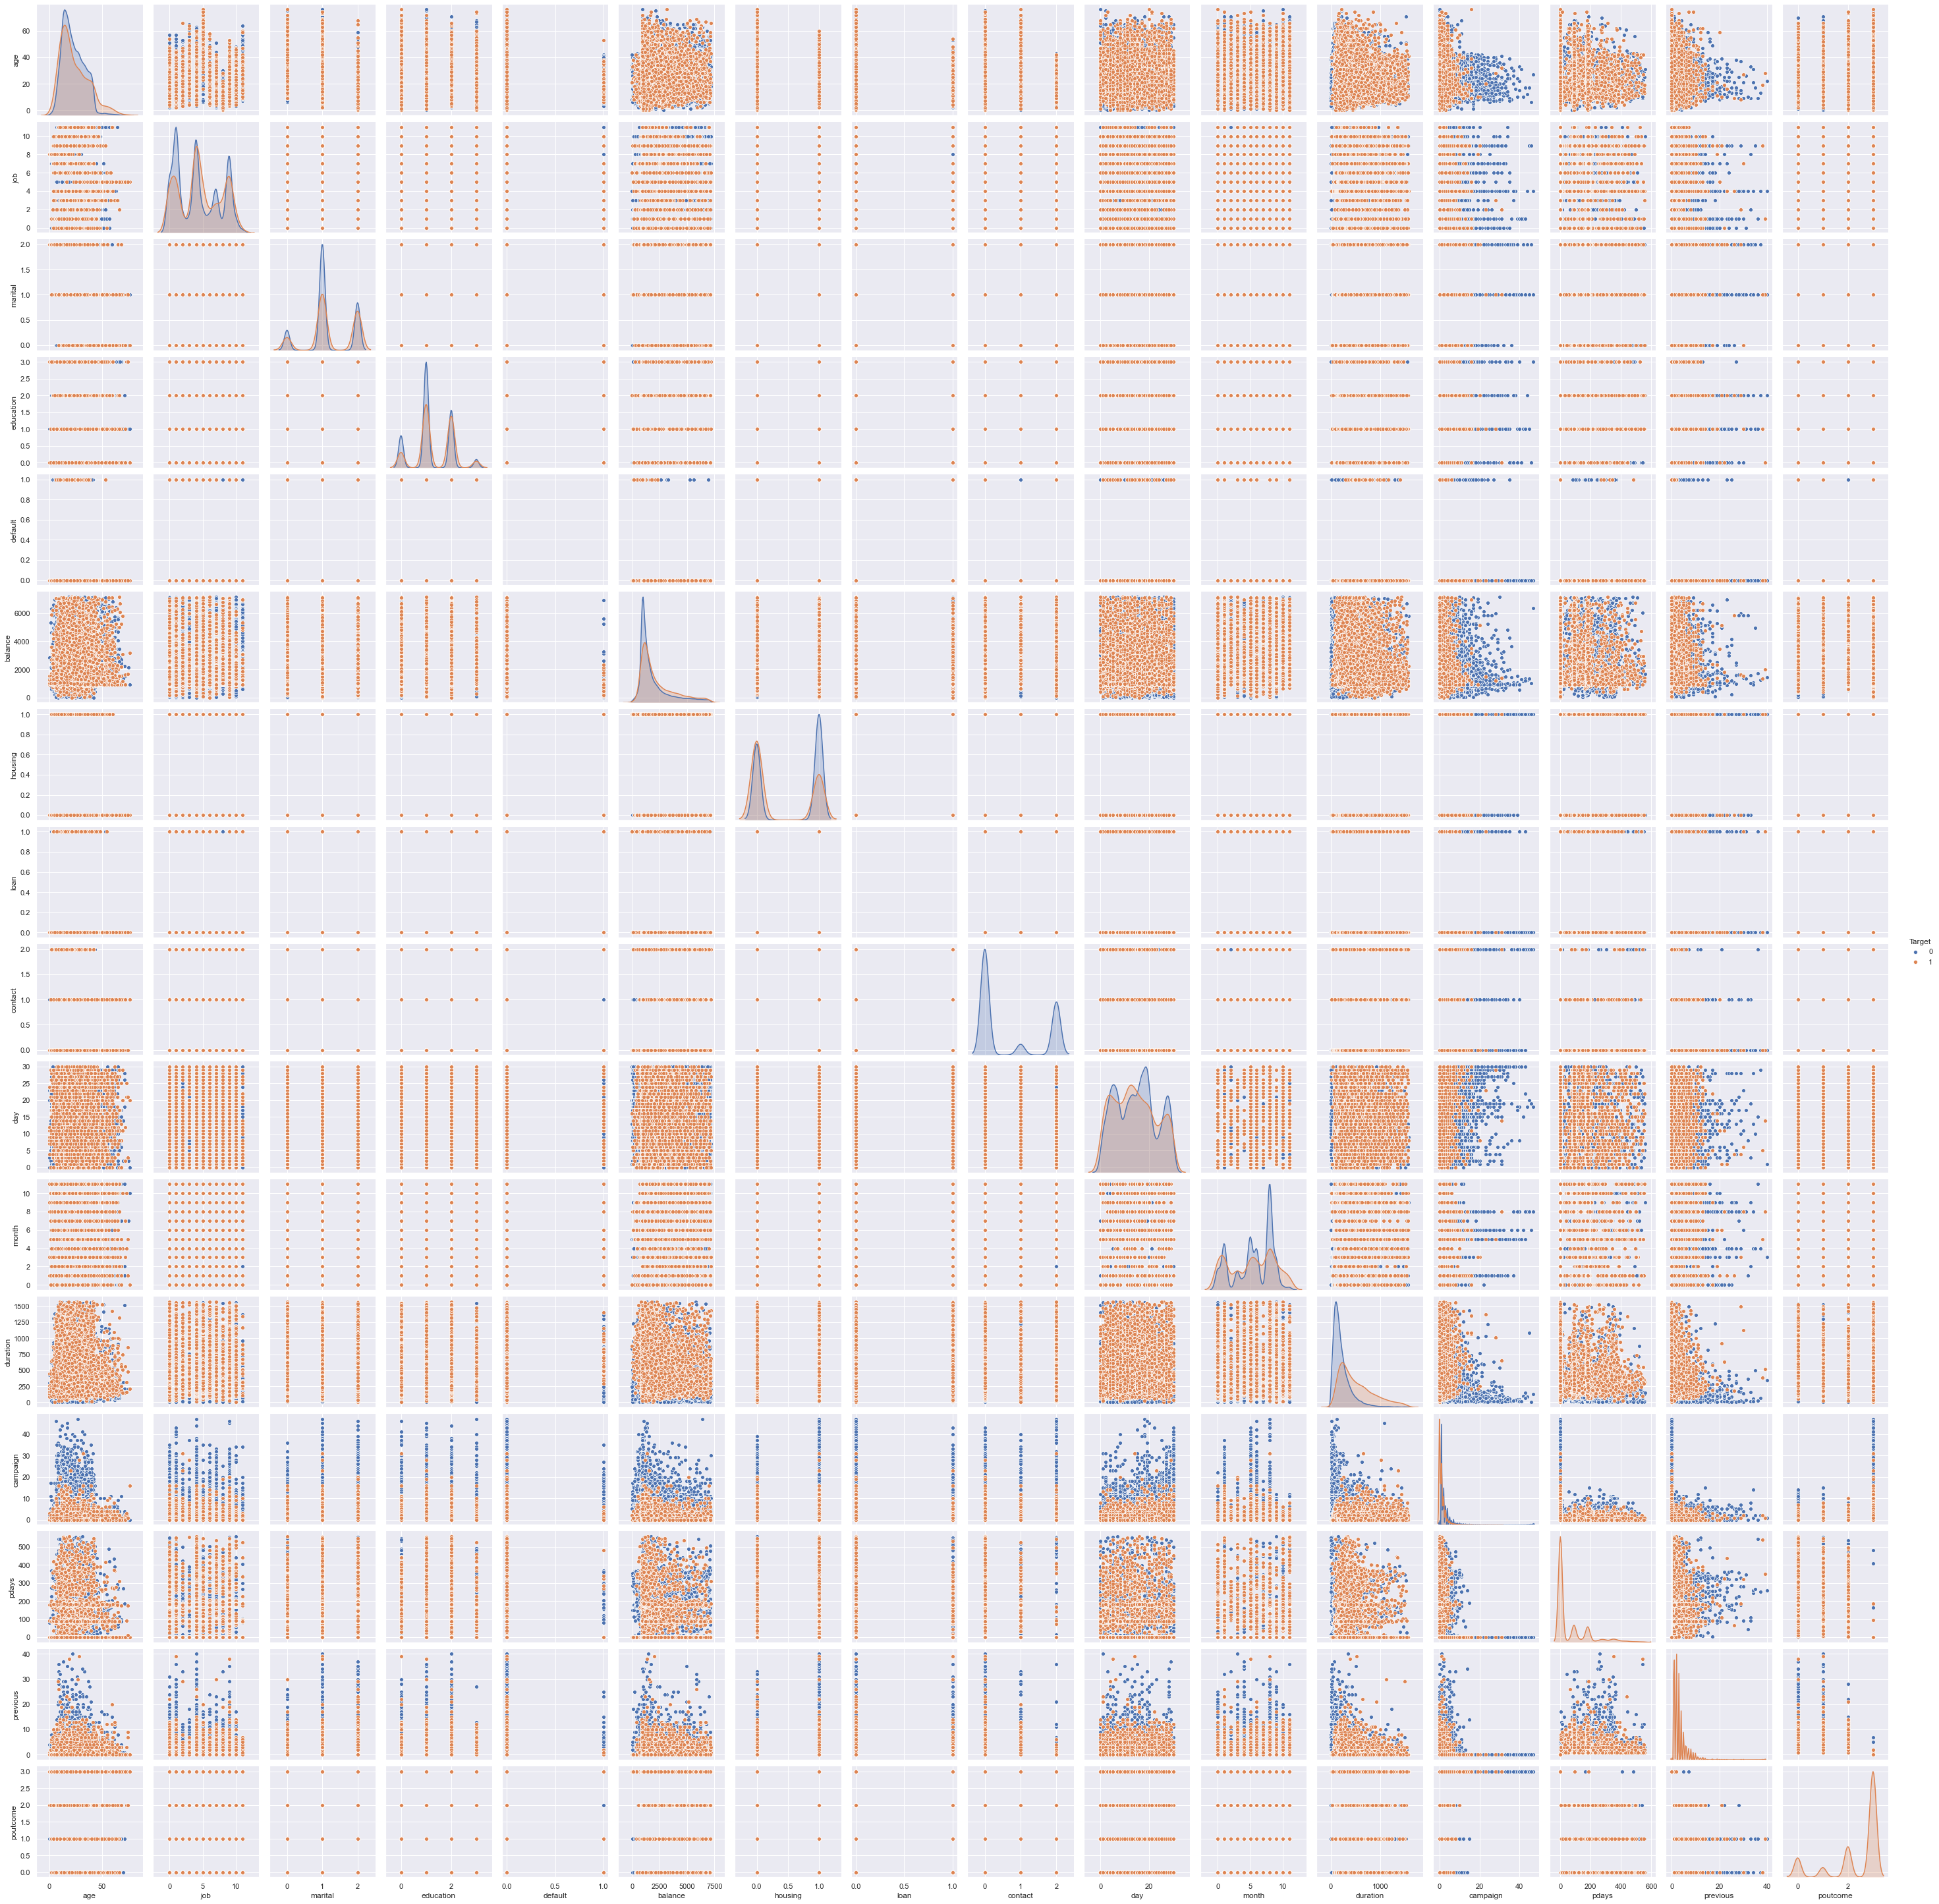

In [15]:
sns.pairplot(bank2, hue='Target')

In [16]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X = bank2[bank2.columns[:-1]]
y = bank2[bank2.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=22)
X_train.shape, X_test.shape

((31647, 16), (13564, 16))

In [17]:
def get_metrics(y, pred):
    return [precision_score(y,pred), recall_score(y,pred), f1_score(y,pred)]

In [18]:
columns='Algorithm Train-Acc Test-Acc Test-Prec Test-Recall Test-F1'.split(' ')
track_list = []


lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_metric = ['Logistic Regression', lr.score(X_train, y_train) , lr.score(X_test, y_test)] + get_metrics(y_test, lr_pred)
track_list.append(lr_metric)
 


ds = DecisionTreeClassifier(criterion='entropy', max_depth=6)
ds.fit(X_train, y_train)
ds_pred = ds.predict(X_test)
ds_metric = ['Decision Tree', ds.score(X_train, y_train) , ds.score(X_test, y_test)] + get_metrics(y_test, ds_pred)
track_list.append(ds_metric)
pd.DataFrame(track_list, columns=columns)
 


rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_metric = ['Random Forest', rf.score(X_train, y_train) , rf.score(X_test, y_test)] + get_metrics(y_test, rf_pred)
track_list.append(rf_metric)
pd.DataFrame(track_list, columns=columns)
 


ab = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
ab_metric = ['Ada Boosting', ab.score(X_train, y_train) , ab.score(X_test, y_test)] + get_metrics(y_test, ab_pred)
track_list.append(ab_metric)
pd.DataFrame(track_list, columns=columns)
 


bc = BaggingClassifier(n_estimators = 100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bc.fit(X_train, y_train)
bc_pred = bc.predict(X_test)
bc_metric = ['Bagging', bc.score(X_train, y_train) , bc.score(X_test, y_test)] + get_metrics(y_test, bc_pred)
track_list.append(bc_metric)
pd.DataFrame(track_list, columns=columns)
 


gb = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_metric = ['Grad Boost', gb.score(X_train, y_train) , gb.score(X_test, y_test)] + get_metrics(y_test, gb_pred)
track_list.append(gb_metric)
pd.DataFrame(track_list, columns=columns)
display(pd.DataFrame(track_list, columns=columns))

,Algorithm,Train-Acc,Test-Acc,Test-Prec,Test-Recall,Test-F1
0,Logistic Regression,0.885834,0.884621,0.523466,0.182275,0.270396
1,Decision Tree,0.905583,0.900619,0.636670,0.355751,0.456452
2,Random Forest,0.999968,0.905043,0.646945,0.419233,0.508772
3,Ada Boosting,0.890448,0.888012,0.577253,0.169076,0.261546
4,Bagging,0.996271,0.905043,0.625726,0.473916,0.539342
5,Grad Boost,0.905868,0.899735,0.642769,0.326838,0.433333


In [19]:
# Checking with balanced Class Weight

In [20]:
columns='Algorithm Train-Acc Test-Acc Test-Prec Test-Recall Test-F1'.split(' ')
track_list = []
class_weight = 'balanced'

lr = LogisticRegression(class_weight=class_weight)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_metric = ['Logistic Regression', lr.score(X_train, y_train) , lr.score(X_test, y_test)] + get_metrics(y_test, lr_pred)
track_list.append(lr_metric)
 


ds = DecisionTreeClassifier(criterion='entropy', max_depth=6,class_weight=class_weight)
ds.fit(X_train, y_train)
ds_pred = ds.predict(X_test)
ds_metric = ['Decision Tree', ds.score(X_train, y_train) , ds.score(X_test, y_test)] + get_metrics(y_test, ds_pred)
track_list.append(ds_metric)
pd.DataFrame(track_list, columns=columns)
 


rf = RandomForestClassifier(n_estimators = 100, class_weight=class_weight)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_metric = ['Random Forest', rf.score(X_train, y_train) , rf.score(X_test, y_test)] + get_metrics(y_test, rf_pred)
track_list.append(rf_metric)
pd.DataFrame(track_list, columns=columns)
 


ab = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
ab_metric = ['Ada Boosting', ab.score(X_train, y_train) , ab.score(X_test, y_test)] + get_metrics(y_test, ab_pred)
track_list.append(ab_metric)
pd.DataFrame(track_list, columns=columns)
 


bc = BaggingClassifier(n_estimators = 100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bc.fit(X_train, y_train)
bc_pred = bc.predict(X_test)
bc_metric = ['Bagging', bc.score(X_train, y_train) , bc.score(X_test, y_test)] + get_metrics(y_test, bc_pred)
track_list.append(bc_metric)
pd.DataFrame(track_list, columns=columns)
 


gb = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_metric = ['Grad Boost', gb.score(X_train, y_train) , gb.score(X_test, y_test)] + get_metrics(y_test, gb_pred)
track_list.append(gb_metric)
pd.DataFrame(track_list, columns=columns)
display(pd.DataFrame(track_list, columns=columns))

,Algorithm,Train-Acc,Test-Acc,Test-Prec,Test-Recall,Test-F1
0,Logistic Regression,0.769109,0.768210,0.306985,0.776241,0.439971
1,Decision Tree,0.774291,0.769168,0.319925,0.859837,0.466337
2,Random Forest,0.999968,0.902978,0.665463,0.347580,0.456647
3,Ada Boosting,0.890448,0.888012,0.577253,0.169076,0.261546
4,Bagging,0.996271,0.905043,0.625726,0.473916,0.539342
5,Grad Boost,0.905868,0.899735,0.642769,0.326838,0.433333


In [21]:
lr_prob = ds.predict_proba(X_test)

In [22]:
TH = 0.7
lr_prob_pred = []
for i in lr_prob:
    if i[1] > TH:
        lr_prob_pred.append(1)
    else:
        lr_prob_pred.append(0)

In [23]:
[ get_metrics(y_test, lr_prob_pred)]


[[0.4622557726465364, 0.6543054682589566, 0.5417642466822794]]

## If we are not concerned about budget on marketing then Recall should be our preference and in that case Descion Tree is giving the best result with Recall of 86 %

## If we are concerned about budget o marketing we should focus on precison in which case we should go for Random Forest with 63% precision

## IF we are to strike a balance we can go with Bagging with F1 score of 54%

## In my opinion we should focus on Recall and go with Descion Trees

### Trying with Standard scaling and One Ho encodeing for JOB

In [24]:
# data with one hot encoding performed on applcable columns
bank3 = bank.copy()
bank3 = bank3[bank3['job'].isna() != 'unknown']
bank3 = bank3[bank3['education'].isna() != 'unknown']
bank3 = pd.get_dummies(bank3, columns=['job'])
bank3 = bank3.apply(LabelEncoder().fit_transform)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
X  = bank3.drop(columns = ['contact','poutcome','Target','month'], axis = 1)
y = bank3['Target']

In [28]:
X = sc.fit_transform(X)

In [29]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=22)
X_train.shape, X_test.shape

((31647, 24), (13564, 24))

In [30]:
columns='Algorithm Train-Acc Test-Acc Test-Prec Test-Recall Test-F1'.split(' ')
track_list = []
class_weight = 'balanced'

lr = LogisticRegression(class_weight=class_weight)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_metric = ['Logistic Regression', lr.score(X_train, y_train) , lr.score(X_test, y_test)] + get_metrics(y_test, lr_pred)
track_list.append(lr_metric)
 


ds = DecisionTreeClassifier(criterion='entropy', max_depth=6,class_weight=class_weight)
ds.fit(X_train, y_train)
ds_pred = ds.predict(X_test)
ds_metric = ['Decision Tree', ds.score(X_train, y_train) , ds.score(X_test, y_test)] + get_metrics(y_test, ds_pred)
track_list.append(ds_metric)
pd.DataFrame(track_list, columns=columns)
 


rf = RandomForestClassifier(n_estimators = 100, class_weight=class_weight)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_metric = ['Random Forest', rf.score(X_train, y_train) , rf.score(X_test, y_test)] + get_metrics(y_test, rf_pred)
track_list.append(rf_metric)
pd.DataFrame(track_list, columns=columns)
 


ab = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
ab_metric = ['Ada Boosting', ab.score(X_train, y_train) , ab.score(X_test, y_test)] + get_metrics(y_test, ab_pred)
track_list.append(ab_metric)
pd.DataFrame(track_list, columns=columns)
 


bc = BaggingClassifier(n_estimators = 100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bc.fit(X_train, y_train)
bc_pred = bc.predict(X_test)
bc_metric = ['Bagging', bc.score(X_train, y_train) , bc.score(X_test, y_test)] + get_metrics(y_test, bc_pred)
track_list.append(bc_metric)
pd.DataFrame(track_list, columns=columns)
 


gb = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_metric = ['Grad Boost', gb.score(X_train, y_train) , gb.score(X_test, y_test)] + get_metrics(y_test, gb_pred)
track_list.append(gb_metric)
pd.DataFrame(track_list, columns=columns)
display(pd.DataFrame(track_list, columns=columns))

,Algorithm,Train-Acc,Test-Acc,Test-Prec,Test-Recall,Test-F1
0,Logistic Regression,0.806206,0.803377,0.350721,0.794469,0.486622
1,Decision Tree,0.779663,0.775288,0.320522,0.817725,0.460531
2,Random Forest,0.999968,0.894500,0.630293,0.243243,0.351020
3,Ada Boosting,0.889942,0.888971,0.605985,0.152734,0.243976
4,Bagging,0.993712,0.896638,0.588899,0.393463,0.471741
5,Grad Boost,0.899295,0.895016,0.600240,0.314268,0.412541


### Trying with binning for Age and Balance

In [31]:
bank4 = bank.copy()
age_bins = [0, 20, 30, 40, 50, 70, 100, 120]
labels = [1,2,3,4,5,6,7]
bank4['age'] = pd.cut(bank4['age'], bins=age_bins, labels=labels)

In [32]:
balance_bins = [-20000, 0, 10000, 20000, 40000, 60000, 90000, 120000]
labels = [1,2,3,4,5,6,7]
bank4['balance'] = pd.cut(bank4['balance'], bins=balance_bins, labels=labels)

In [33]:
bank4 = pd.get_dummies(bank4, columns=['job'])

In [34]:
bank4 = bank4.apply(LabelEncoder().fit_transform)

In [35]:
X  = bank3.drop(columns = ['contact','poutcome','Target'], axis = 1)
y = bank3['Target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=22)
X_train.shape, X_test.shape

((31647, 25), (13564, 25))

In [37]:
columns='Algorithm Train-Acc Test-Acc Test-Prec Test-Recall Test-F1'.split(' ')
track_list = []
class_weight = 'balanced'

lr = LogisticRegression(class_weight=class_weight)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_metric = ['Logistic Regression', lr.score(X_train, y_train) , lr.score(X_test, y_test)] + get_metrics(y_test, lr_pred)
track_list.append(lr_metric)
 


ds = DecisionTreeClassifier(criterion='entropy', max_depth=6,class_weight=class_weight)
ds.fit(X_train, y_train)
ds_pred = ds.predict(X_test)
ds_metric = ['Decision Tree', ds.score(X_train, y_train) , ds.score(X_test, y_test)] + get_metrics(y_test, ds_pred)
track_list.append(ds_metric)
pd.DataFrame(track_list, columns=columns)
 


rf = RandomForestClassifier(n_estimators = 100, class_weight=class_weight)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_metric = ['Random Forest', rf.score(X_train, y_train) , rf.score(X_test, y_test)] + get_metrics(y_test, rf_pred)
track_list.append(rf_metric)
pd.DataFrame(track_list, columns=columns)
 


ab = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
ab_metric = ['Ada Boosting', ab.score(X_train, y_train) , ab.score(X_test, y_test)] + get_metrics(y_test, ab_pred)
track_list.append(ab_metric)
pd.DataFrame(track_list, columns=columns)
 


bc = BaggingClassifier(n_estimators = 100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bc.fit(X_train, y_train)
bc_pred = bc.predict(X_test)
bc_metric = ['Bagging', bc.score(X_train, y_train) , bc.score(X_test, y_test)] + get_metrics(y_test, bc_pred)
track_list.append(bc_metric)
pd.DataFrame(track_list, columns=columns)
 


gb = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_metric = ['Grad Boost', gb.score(X_train, y_train) , gb.score(X_test, y_test)] + get_metrics(y_test, gb_pred)
track_list.append(gb_metric)
pd.DataFrame(track_list, columns=columns)
display(pd.DataFrame(track_list, columns=columns))

,Algorithm,Train-Acc,Test-Acc,Test-Prec,Test-Recall,Test-F1
0,Logistic Regression,0.759914,0.761575,0.299878,0.773727,0.432233
1,Decision Tree,0.786741,0.782734,0.327656,0.810182,0.466606
2,Random Forest,1.000000,0.897154,0.632791,0.293526,0.401030
3,Ada Boosting,0.890227,0.888381,0.594132,0.152734,0.243000
4,Bagging,0.995639,0.900103,0.599831,0.445632,0.511360
5,Grad Boost,0.900338,0.895606,0.605042,0.316782,0.415842
